### 2.6.1 基本概率论

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [13]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [14]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 1., 1., 3., 4., 1.])

In [26]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts

tensor([165., 181., 164., 164., 177., 149.])

In [27]:
counts / 1000

tensor([0.1650, 0.1810, 0.1640, 0.1640, 0.1770, 0.1490])

In [28]:
1 / 6

0.16666666666666666

In [29]:
# 进行500组实验, 每组抽取10个样本
counts = multinomial.Multinomial(10, fair_probs).sample([500])
counts

tensor([[2., 1., 1., 2., 1., 3.],
        [2., 2., 0., 3., 2., 1.],
        [1., 1., 1., 1., 3., 3.],
        ...,
        [5., 1., 2., 1., 0., 1.],
        [3., 1., 1., 2., 2., 1.],
        [0., 3., 1., 1., 1., 4.]])

In [31]:
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[  2.,   1.,   1.,   2.,   1.,   3.],
        [  4.,   3.,   1.,   5.,   3.,   4.],
        [  5.,   4.,   2.,   6.,   6.,   7.],
        ...,
        [841., 872., 820., 820., 765., 862.],
        [844., 873., 821., 822., 767., 863.],
        [844., 876., 822., 823., 768., 867.]])

In [38]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)
estimates

tensor([[0.2000, 0.1000, 0.1000, 0.2000, 0.1000, 0.3000],
        [0.2000, 0.1500, 0.0500, 0.2500, 0.1500, 0.2000],
        [0.1667, 0.1333, 0.0667, 0.2000, 0.2000, 0.2333],
        ...,
        [0.1689, 0.1751, 0.1647, 0.1647, 0.1536, 0.1731],
        [0.1691, 0.1749, 0.1645, 0.1647, 0.1537, 0.1729],
        [0.1688, 0.1752, 0.1644, 0.1646, 0.1536, 0.1734]])

<Figure size 7200x6000 with 0 Axes>

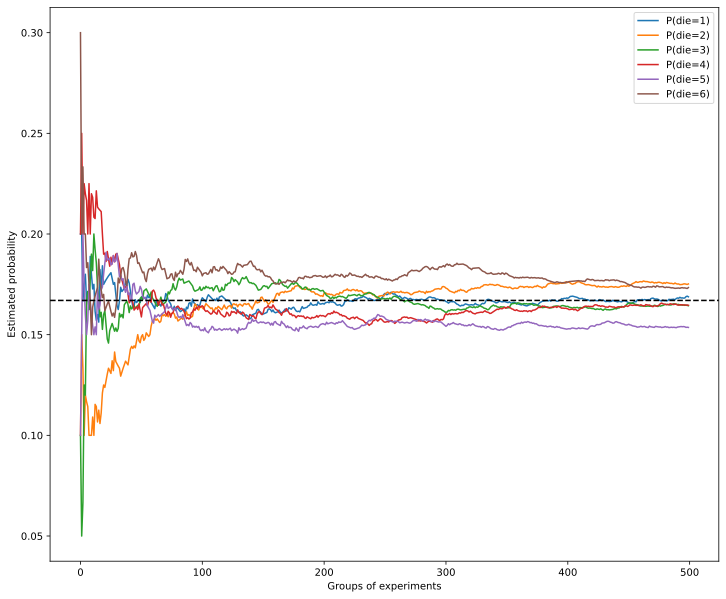

<Figure size 7200x6000 with 0 Axes>

In [57]:
d2l.set_figsize([12, 10])
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=f"P(die={str(i + 1)})")
    # break

d2l.plt.axhline(y=0.167, color="black", linestyle="dashed")
d2l.plt.gca().set_xlabel("Groups of experiments")
d2l.plt.gca().set_ylabel("Estimated probability")
d2l.plt.legend()
d2l.plt.figure(dpi=600)

In [1]:
0.01 * (1 - 0.0015) + 1 * 0.0015

0.011485

In [2]:
0.0015 / 0.011485

0.13060513713539398